<a href="https://www.kaggle.com/code/mateuscpinheiro/analisando-fiis?scriptVersionId=231915685" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Carregamento das bases de dados
## Fundsexplorer
Dataset baixado manualmente do [Ranking do Fundsexplorer](https://www.fundsexplorer.com.br/ranking#upTo--default-fiis-table) e carregado no Kaggle.

In [2]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)

#tirar valores nulos da coluna subsetor
fiis_class = fiis_class.dropna(subset='Setor')
if fiis_class.columns[0] == 'Todos os Setores (17)':
    fiis_class = fiis_class.rename(columns={'Todos os Setores (17)' : 'FUNDOS'})

fiis_class

,Fundos,Setor,Preço Atual (R$),Liquidez Diária (R$),P/VP,Último Dividendo,Dividend Yield,DY (3M) Acumulado,DY (6M) Acumulado,DY (12M) Acumulado,...,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quant. Ativos,Volatilidade,Num. Cotistas,Tax. Gestão,Tax. Performance,Tax. Administração
0,AAGR11,Indefinido,97.30,13464.65,NaN,1.21,0.0126,0.0396,0.0757,0.1510,...,0.0000,0.0000,0.0000,0.0000,0,68.85,0,NaN,NaN,NaN
1,AAZQ11,Indefinido,7.21,620305.74,0.83,0.10,0.0129,0.0423,0.0924,0.1790,...,0.0110,0.0000,0.0000,0.0000,0,25.62,29667,NaN,NaN,NaN
2,ABCP11,Shoppings,74.68,64070.96,0.71,0.50,0.0066,0.0201,0.0491,0.1043,...,0.0046,0.1725,0.1780,0.2618,1,34.47,14987,NaN,NaN,NaN
3,AFHI11,Papéis,91.69,845690.57,0.99,0.98,0.0105,0.0324,0.0639,0.1280,...,0.0104,-0.0185,-0.0083,0.0539,14,12.16,42586,NaN,NaN,NaN
4,AGRX11,Indefinido,8.55,173769.39,0.83,0.11,0.0138,0.0424,0.0748,0.1591,...,0.0108,0.0000,0.0000,0.0000,0,33.41,19514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,YUFI11B,Indefinido,NaN,NaN,NaN,0.63,0.0000,0.0000,0.0000,0.0000,...,0.0060,-0.0001,0.0059,0.0632,0,NaN,0,NaN,NaN,NaN
522,ZAGH11,Serviços Financeiros Diversos,10.40,5179.83,1.16,0.07,0.0078,0.0164,0.0321,0.0604,...,NaN,NaN,NaN,NaN,1,64.72,400,NaN,NaN,NaN
523,ZAVC11,Indefinido,9.39,8070.39,0.89,0.13,0.0000,0.0273,0.0668,0.1440,...,NaN,NaN,NaN,NaN,1,80.46,160,NaN,NaN,NaN
524,ZAVI11,Indefinido,92.81,217471.35,0.70,1.05,0.0112,0.0345,0.0727,0.1392,...,NaN,NaN,NaN,NaN,10,43.50,3353,NaN,NaN,NaN


## Transformando os números percentuais 

In [3]:
fiis_class.iloc[:,6:17] = fiis_class.iloc[:,6:17]*100
fiis_class.iloc[:,6:18]

,Dividend Yield,DY (3M) Acumulado,DY (6M) Acumulado,DY (12M) Acumulado,DY (3M) média,DY (6M) média,DY (12M) média,DY Ano,Variação Preço,Rentab. Período,Rentab. Acumulada,Patrimônio Líquido
0,1.26,3.96,7.57,15.10,1.32,1.26,1.26,3.96,10.48,11.88,6.99,NaN
1,1.29,4.23,9.24,17.90,1.41,1.54,1.49,6.24,14.75,16.23,19.85,2.072108e+08
2,0.66,2.01,4.91,10.43,0.67,0.82,0.87,2.78,1.90,2.57,17.50,5.069692e+08
3,1.05,3.24,6.39,12.80,1.08,1.07,1.07,3.24,7.22,8.35,10.83,4.246119e+08
4,1.38,4.24,7.48,15.91,1.41,1.25,1.33,4.24,8.30,9.79,17.76,1.831891e+08
...,...,...,...,...,...,...,...,...,...,...,...,...
521,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN,0.00,0.00,0.00,NaN
522,0.78,1.64,3.21,6.04,0.55,0.54,0.50,2.10,-12.88,-12.20,-27.91,7.970520e+07
523,0.00,2.73,6.68,14.40,0.91,1.11,1.31,0.00,0.00,0.00,NaN,3.157915e+07
524,1.12,3.45,7.27,13.92,1.15,1.21,1.16,4.93,-4.65,-3.59,0.53,1.551468e+08


## Transformando patrimônio em milhões

In [4]:
fiis_class['Patrimônio Líquido'] = (fiis_class['Patrimônio Líquido']/1000000).round(decimals=2)

fiis_class[['Fundos','Patrimônio Líquido']]

,Fundos,Patrimônio Líquido
0,AAGR11,NaN
1,AAZQ11,207.21
2,ABCP11,506.97
3,AFHI11,424.61
4,AGRX11,183.19
...,...,...
521,YUFI11B,NaN
522,ZAGH11,79.71
523,ZAVC11,31.58
524,ZAVI11,155.15


## Statusinvest
Outra base a ser carregada é a [busca avançada de FIIs do Statusinvest](https://statusinvest.com.br/fundos-imobiliarios/busca-avancada):

In [5]:
fiis_status = pd.read_csv('/kaggle/input/fiis-statusinvest/fiis-statusinvest-busca-avancada.csv', sep = ';')
fiis_status

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,"74,44","0,500000","8,91","107,66","0,69","64.070,96","2,05","0,51","15,02","506.969.232,82","14.987,00",Passiva,"4.709.082,00"
1,AFHI11,"92,13","0,980000","12,37","93,21","0,99","845.690,57","3,23","-6,55","11,71","424.611.949,75","42.586,00",Ativa,"4.555.618,00"
2,AIEC11,"45,31","0,320000","16,84","77,78","0,58","317.342,91","7,97","-5,07","-5,10","375.308.692,99","18.384,00",Ativa,"4.824.987,00"
3,AJFI11,"7,30","0,070000","11,23","12,16","0,60","1.983.097,91","0,93",NaN,NaN,"384.705.054,16","12.950,00",Ativa,"31.625.978,00"
4,ALMI11,"531,50","1,990255","6,57","2.107,18","0,26","11.808,48","4,12",NaN,"-15,19","234.269.728,92","2.006,00",Passiva,"111.177,00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
574,YUFI11,"59,50","0,154813","4,66","106,15","0,56","0,00","1,29",NaN,NaN,"52.292.420,94","56,00",Ativa,"492.650,00"
575,ZAGH11,"10,40","0,070000","7,67","8,96","1,16","5.179,83","0,08",NaN,NaN,"79.705.199,51","400,00",NaN,"8.891.662,00"
576,ZAVC11,"8,50","0,130000","15,65","10,20","0,83","8.070,39","2,37",NaN,NaN,"31.579.152,62","160,00",Ativa,"3.097.348,00"
577,ZAVI11,"93,09","1,050000","14,42","132,23","0,70","217.471,35","5,31",NaN,NaN,"155.146.750,77","3.353,00",Ativa,"1.173.322,00"


In [6]:
fiis_status.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   TICKER                   579 non-null    object
 1   PRECO                    579 non-null    object
 2   ULTIMO DIVIDENDO         476 non-null    object
 3   DY                       579 non-null    object
 4   VALOR PATRIMONIAL COTA   576 non-null    object
 5   P/VP                     471 non-null    object
 6   LIQUIDEZ MEDIA DIARIA    418 non-null    object
 7   PERCENTUAL EM CAIXA      565 non-null    object
 8   CAGR DIVIDENDOS 3 ANOS   278 non-null    object
 9    CAGR VALOR CORA 3 ANOS  289 non-null    object
 10  PATRIMONIO               576 non-null    object
 11  N COTISTAS               576 non-null    object
 12  GESTAO                   475 non-null    object
 13   N COTAS                 579 non-null    object
dtypes: object(14)
memory usage: 63.5+ KB


### Formatação dos números no DataFrame statusinvest

Nota-se que os os dados estão em formato brasileiro, pontos (.) separando casas de milhar e vírgulas (,) separando as casas decimais.
Será feito o ajuste de imediato

In [7]:
fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))
fiis_status = fiis_status.apply(lambda x: x.str.replace(',', '.'))
colunas = fiis_status.columns.to_list()
colunas.remove('TICKER')
colunas.remove('GESTAO')

for x in colunas:
   fiis_status[x] = pd.to_numeric(fiis_status[x], downcast="float")

print(fiis_status.info())
fiis_status.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   579 non-null    object 
 1   PRECO                    579 non-null    float64
 2   ULTIMO DIVIDENDO         476 non-null    float32
 3   DY                       579 non-null    float32
 4   VALOR PATRIMONIAL COTA   576 non-null    float64
 5   P/VP                     471 non-null    float32
 6   LIQUIDEZ MEDIA DIARIA    418 non-null    float64
 7   PERCENTUAL EM CAIXA      565 non-null    float32
 8   CAGR DIVIDENDOS 3 ANOS   278 non-null    float32
 9    CAGR VALOR CORA 3 ANOS  289 non-null    float32
 10  PATRIMONIO               576 non-null    float64
 11  N COTISTAS               576 non-null    float32
 12  GESTAO                   475 non-null    object 
 13   N COTAS                 579 non-null    float64
dtypes: float32(7), float64(5),

/tmp/ipykernel_32/927534397.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  fiis_status = fiis_status.apply(lambda x: x.str.replace('.', ''))


,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,ABCP11,74.44,0.500000,8.91,107.66,0.69,64070.96,2.05,0.51,15.02,5.069692e+08,14987.0,Passiva,4709082.0
1,AFHI11,92.13,0.980000,12.37,93.21,0.99,845690.57,3.23,-6.55,11.71,4.246119e+08,42586.0,Ativa,4555618.0
2,AIEC11,45.31,0.320000,16.84,77.78,0.58,317342.91,7.97,-5.07,-5.10,3.753087e+08,18384.0,Ativa,4824987.0
3,AJFI11,7.30,0.070000,11.23,12.16,0.60,1983097.91,0.93,NaN,NaN,3.847051e+08,12950.0,Ativa,31625978.0
4,ALMI11,531.50,1.990255,6.57,2107.18,0.26,11808.48,4.12,NaN,-15.19,2.342697e+08,2006.0,Passiva,111177.0


Para padronizar com a base do Fundsexplorer, vamos transformar o patrimônio em milhões

In [8]:
fiis_status['PATRIMONIO'] = (fiis_status['PATRIMONIO']/1000000).round(decimals=2)
fiis_status[['TICKER','PATRIMONIO']]

,TICKER,PATRIMONIO
0,ABCP11,506.97
1,AFHI11,424.61
2,AIEC11,375.31
3,AJFI11,384.71
4,ALMI11,234.27
...,...,...
574,YUFI11,52.29
575,ZAGH11,79.71
576,ZAVC11,31.58
577,ZAVI11,155.15


As colunas desta tabela são:

In [9]:
fiis_status.columns

Index(['TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA',
       'P/VP', 'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS'],
      dtype='object')

Comparando a quantidade de fundos imobiliários em cada tabela carregada.

In [10]:
print(f'Quantidade de fundos carregados: \nFunds Explorer: {fiis_class.shape[0]} \n  Statusinvest: {fiis_status.shape[0]}')

Quantidade de fundos carregados: 
Funds Explorer: 525 
  Statusinvest: 579


In [11]:
fiis_class = pd.read_excel('/kaggle/input/fiis-statusinvest/fiis-fundsexplorer (cpia manual).xlsx', header=2)

#tirar valores nulos da coluna subsetor
fiis_class = fiis_class.dropna(subset='Setor')
if fiis_class.columns[0] == 'Todos os Setores (17)':
    fiis_class = fiis_class.rename(columns={'Todos os Setores (17)' : 'Fundos'})

fiis_class

,Fundos,Setor,Preço Atual (R$),Liquidez Diária (R$),P/VP,Último Dividendo,Dividend Yield,DY (3M) Acumulado,DY (6M) Acumulado,DY (12M) Acumulado,...,DY Patrimonial,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quant. Ativos,Volatilidade,Num. Cotistas,Tax. Gestão,Tax. Performance,Tax. Administração
0,AAGR11,Indefinido,97.30,13464.65,NaN,1.21,0.0126,0.0396,0.0757,0.1510,...,0.0000,0.0000,0.0000,0.0000,0,68.85,0,NaN,NaN,NaN
1,AAZQ11,Indefinido,7.21,620305.74,0.83,0.10,0.0129,0.0423,0.0924,0.1790,...,0.0110,0.0000,0.0000,0.0000,0,25.62,29667,NaN,NaN,NaN
2,ABCP11,Shoppings,74.68,64070.96,0.71,0.50,0.0066,0.0201,0.0491,0.1043,...,0.0046,0.1725,0.1780,0.2618,1,34.47,14987,NaN,NaN,NaN
3,AFHI11,Papéis,91.69,845690.57,0.99,0.98,0.0105,0.0324,0.0639,0.1280,...,0.0104,-0.0185,-0.0083,0.0539,14,12.16,42586,NaN,NaN,NaN
4,AGRX11,Indefinido,8.55,173769.39,0.83,0.11,0.0138,0.0424,0.0748,0.1591,...,0.0108,0.0000,0.0000,0.0000,0,33.41,19514,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,YUFI11B,Indefinido,NaN,NaN,NaN,0.63,0.0000,0.0000,0.0000,0.0000,...,0.0060,-0.0001,0.0059,0.0632,0,NaN,0,NaN,NaN,NaN
522,ZAGH11,Serviços Financeiros Diversos,10.40,5179.83,1.16,0.07,0.0078,0.0164,0.0321,0.0604,...,NaN,NaN,NaN,NaN,1,64.72,400,NaN,NaN,NaN
523,ZAVC11,Indefinido,9.39,8070.39,0.89,0.13,0.0000,0.0273,0.0668,0.1440,...,NaN,NaN,NaN,NaN,1,80.46,160,NaN,NaN,NaN
524,ZAVI11,Indefinido,92.81,217471.35,0.70,1.05,0.0112,0.0345,0.0727,0.1392,...,NaN,NaN,NaN,NaN,10,43.50,3353,NaN,NaN,NaN


## IFIX

Notou-se que algumas amostras não têm dados e é preciso algum critério para classificar se o FII é descartável ou não.

Portanto, em caso de dúvida, utilizarei como referência os fundos que compõem o [Índice de Fundos de Investimentos Imobiliários (IFIX B3)]('https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-de-segmentos-e-setoriais/indice-de-fundos-de-investimentos-imobiliarios-ifix.htm') como importantes de se manter e os demais quando descartáveis.


In [12]:
ifix = pd.read_csv('/kaggle/input/fiis-statusinvest/IFIX.csv', sep=';', header=1, encoding='latin-1')

#realocando as colunas que foram carregadas deslocadas para frente
colunas = list(ifix.columns)
colunas.pop(0)
ifix.drop('Part. (%)', axis='columns', inplace=True)
ifix.columns=colunas

#excluindo as linhas sem dados
ifix = ifix.dropna()

ifix = ifix.apply(lambda x: x.str.replace(',', '.'))

#selecionando apenas a colunas relevante

ifix = ifix['Part. (%)']
ifix = ifix.rename('ifix')
ifix= pd.to_numeric(ifix, errors= 'coerce')
ifix

CACR11    0.310
AFHI11    0.340
ALZR11    0.895
RZAT11    0.274
ARRI11    0.093
          ...  
XPIN11    0.456
XPLG11    2.532
XPML11    3.498
XPPR11    0.120
XPSF11    0.289
Name: ifix, Length: 108, dtype: float64

In [13]:
ifix.sort_values(ascending=False)

KNIP11    6.037
KNCR11    4.619
HGLG11    4.368
XPML11    3.498
BTLG11    3.251
          ...  
BLMG11    0.119
SADI11    0.110
VSLH11    0.094
ARRI11    0.093
TORD11    0.057
Name: ifix, Length: 108, dtype: float64

# Fusão das tabelas

Primeiramente, fundiremos as duas principais tabelas, do funds explorer e do status invest:

In [14]:
fiis_status.columns

Index(['TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA',
       'P/VP', 'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS'],
      dtype='object')

In [15]:
fiis_temp = fiis_status.merge(right = fiis_class, 
                         how = 'outer',
                        left_on = fiis_status['TICKER'],
                        right_on = fiis_class['Fundos'])
fiis_temp = fiis_temp.rename(columns={'key_0': 'ticker'})
fiis_temp[['ticker','TICKER','Fundos']]

,ticker,TICKER,Fundos
0,ABCP11,ABCP11,ABCP11
1,AFHI11,AFHI11,AFHI11
2,AIEC11,AIEC11,AIEC11
3,AJFI11,AJFI11,AJFI11
4,ALMI11,ALMI11,ALMI11
...,...,...,...
676,XPID11,NaN,XPID11
677,XPIE11,NaN,XPIE11
678,XPPR11,NaN,XPPR11
679,XTED11,NaN,XTED11


Analisando os fundos listados exclusivamente na tabela do fundsexplorer:

In [16]:
print(f'Quantidade de fundos carregados: \n         Total: {fiis_temp.shape[0]}\nFunds Explorer: {fiis_status.shape[0]} -\n                ____\n     Diferença: {fiis_temp.shape[0]-fiis_status.shape[0]}')

Quantidade de fundos carregados: 
         Total: 681
Funds Explorer: 579 -
                ____
     Diferença: 102


Agora juntando a tabela resultante da fusão com o percentual no IFIX.

In [17]:
fiis = fiis_temp.merge(right = ifix, 
                         how = 'outer',
                        left_on = fiis_temp['ticker'],
                        right_on = ifix.index)

fiis[['key_0','ifix']].dropna()

,key_0,ifix
1,AFHI11,0.340
2,AIEC11,0.211
7,ALZR11,0.895
16,ARRI11,0.093
26,BARI11,0.308
...,...,...
570,XPML11,3.498
572,XPSF11,0.289
637,LGCP11,0.250
678,XPPR11,0.120


## key_0, TICKER e FUNDOS

In [18]:
fiis[['key_0','ticker','Fundos']].query('key_0 != ticker')

,key_0,ticker,Fundos
681,GALG11,NaN,NaN


Todas as colunas `TICKER` e `FUNDOS` são iguais à réplica da `key_0` ou NaN, então podem ser descartadas.

In [19]:
fiis.columns

Index(['key_0', 'ticker', 'TICKER', 'PRECO', 'ULTIMO DIVIDENDO', 'DY',
       'VALOR PATRIMONIAL COTA', 'P/VP_x', 'LIQUIDEZ MEDIA DIARIA',
       'PERCENTUAL EM CAIXA', 'CAGR DIVIDENDOS 3 ANOS',
       ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO', 'N COTISTAS', 'GESTAO',
       ' N COTAS', 'Fundos', 'Setor', 'Preço Atual (R$)',
       'Liquidez Diária (R$)', 'P/VP_y', 'Último Dividendo', 'Dividend Yield',
       'DY (3M) Acumulado', 'DY (6M) Acumulado', 'DY (12M) Acumulado',
       'DY (3M) média', 'DY (6M) média', 'DY (12M) média', 'DY Ano',
       'Variação Preço', 'Rentab. Período', 'Rentab. Acumulada',
       'Patrimônio Líquido', 'VPA', 'P/VPA', 'DY Patrimonial',
       'Variação Patrimonial', 'Rentab. Patr. Período',
       'Rentab. Patr. Acumulada', 'Quant. Ativos', 'Volatilidade',
       'Num. Cotistas', 'Tax. Gestão', 'Tax. Performance',
       'Tax. Administração', 'ifix'],
      dtype='object')

In [20]:
fiis.pop('TICKER')
fiis.pop('Fundos')
fiis.pop('ticker')
fiis=fiis.set_index(fiis.key_0) # inplace substitui a dataframe atual
print(fiis.shape)
fiis.pop('key_0')


(682, 44)


key_0
ABCP11      ABCP11
AFHI11      AFHI11
AIEC11      AIEC11
AJFI11      AJFI11
ALMI11      ALMI11
            ...   
XPIE11      XPIE11
XPPR11      XPPR11
XTED11      XTED11
YUFI11B    YUFI11B
GALG11      GALG11
Name: key_0, Length: 682, dtype: object

Renomeando o índice para 'ticker'

In [21]:
fiis.index.names=['ticker']
fiis.sample(n=20)


,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP_x,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,...,Variação Patrimonial,Rentab. Patr. Período,Rentab. Patr. Acumulada,Quant. Ativos,Volatilidade,Num. Cotistas,Tax. Gestão,Tax. Performance,Tax. Administração,ifix
ticker,,,,,,,,,,,,,,,,,,,,,
SPVJ11,0.00,0.125300,0.000000,30.95,NaN,NaN,20.320000,33.389999,NaN,195.35,...,-0.7337,-0.7326,-0.6893,14.0,NaN,25.0,NaN,NaN,NaN,NaN
TORM13,142.00,10.562960,0.000000,63.81,2.23,NaN,3.500000,NaN,NaN,118.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
QNTS11,0.00,0.410000,0.000000,173.08,NaN,NaN,1.570000,NaN,NaN,234.27,...,NaN,NaN,NaN,2.0,NaN,136.0,NaN,NaN,NaN,NaN
HCTR11,21.31,0.320000,20.610001,101.08,0.21,1911853.57,0.630000,-32.549999,-34.779999,2232.37,...,-0.1672,-0.1646,-0.0151,14.0,41.57,143549.0,NaN,NaN,NaN,0.637
ESTQ11,0.00,NaN,0.000000,0.01,NaN,NaN,106.099998,NaN,NaN,0.84,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VTPL11,72.10,5.110000,0.000000,100.81,0.72,0.00,1.760000,NaN,NaN,139.75,...,NaN,NaN,NaN,1.0,NaN,54.0,NaN,NaN,NaN,NaN
EMET11,10.05,NaN,0.000000,9.46,1.06,171193.78,1.570000,NaN,NaN,47.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
JPPA11,80.00,1.000000,15.740000,94.85,0.84,86450.22,0.910000,-13.300000,9.780000,85.75,...,-0.0353,-0.0245,0.0978,14.0,17.63,6996.0,NaN,NaN,NaN,NaN
BIME11,6.89,0.090000,14.800000,8.36,0.83,73712.30,1.170000,-7.020000,4.540000,48.88,...,-0.0742,-0.0642,0.0033,3.0,16.62,8490.0,NaN,NaN,NaN,NaN


# Tratamento das colunas

Pirmeiramente, avaliaremos as colunas do dataset.

As colunas com nomes originais são:

In [22]:
colunas = fiis.columns
colunas

Index(['PRECO', 'ULTIMO DIVIDENDO', 'DY', 'VALOR PATRIMONIAL COTA', 'P/VP_x',
       'LIQUIDEZ MEDIA DIARIA', 'PERCENTUAL EM CAIXA',
       'CAGR DIVIDENDOS 3 ANOS', ' CAGR VALOR CORA 3 ANOS', 'PATRIMONIO',
       'N COTISTAS', 'GESTAO', ' N COTAS', 'Setor', 'Preço Atual (R$)',
       'Liquidez Diária (R$)', 'P/VP_y', 'Último Dividendo', 'Dividend Yield',
       'DY (3M) Acumulado', 'DY (6M) Acumulado', 'DY (12M) Acumulado',
       'DY (3M) média', 'DY (6M) média', 'DY (12M) média', 'DY Ano',
       'Variação Preço', 'Rentab. Período', 'Rentab. Acumulada',
       'Patrimônio Líquido', 'VPA', 'P/VPA', 'DY Patrimonial',
       'Variação Patrimonial', 'Rentab. Patr. Período',
       'Rentab. Patr. Acumulada', 'Quant. Ativos', 'Volatilidade',
       'Num. Cotistas', 'Tax. Gestão', 'Tax. Performance',
       'Tax. Administração', 'ifix'],
      dtype='object')

## Renomeando as colunas

Agora renomearei as colunas com um nome mais amigável para o código:

In [23]:
colunas = {'PRECO': 'preco_status', 
           'ULTIMO DIVIDENDO': 'dividendo_status', 
           'DY': 'dy_status', 
           'VALOR PATRIMONIAL COTA': 'pva_status', 
           'P/VP_x': 'pvp_status',
           'LIQUIDEZ MEDIA DIARIA': 'liquidez_diaria', 
           'PERCENTUAL EM CAIXA': 'perc_caixa',
           'CAGR DIVIDENDOS 3 ANOS': 'cagr_div_3a', 
           ' CAGR VALOR CORA 3 ANOS': 'cagr_valor_3a', 
           'PATRIMONIO': 'patr_milhoes_status',
           'N COTISTAS': 'n_cotistas_status', 
           'GESTAO': 'gestao',
           ' N COTAS': 'n_cotas_status',
          'Setor': 'subsetor',
          'Preço Atual (R$)': 'preco_funds', 
          'Liquidez Diária (R$)': 'liq_diaria_funds', 
          'P/VP_y': 'pvp_funds',
          'Último Dividendo': 'ult_dividendo_funds', 
          'Dividend Yield': 'dy_funds', 
          'DY (3M) Acumulado': 'dy_3m_acum',
          'DY (6M) Acumulado': 'dy_6m_acum', 
          'DY (12M) Acumulado': 'dy_12m_acum', 
          'DY (3M) média': 'dy_3m_media',
          'DY (6M) média': 'dy_6m_media', 
          'DY (12M) média': 'dy_12m_media', 
          'DY Ano':'dy_ano_funds', 
          'Variação Preço': 'var_preco',
          'Rentab. Período': 'rentabilidade', 
          'Rentab. Acumulada': 'rentabilidade_acum', 
          'Patrimônio Líquido': 'patr_milhoes_funds', 
          'VPA': 'vpa_funds',
          'P/VPA': 'pvpa_funds', 
          'DY Patrimonial': 'dy_patr', 
          'Variação Patrimonial': 'var_patr',
          'Rentab. Patr. Período': 'rentab_patr', 
          'Rentab. Patr. Acumulada': 'rentab_patr_acum', 
          'VACÂNCIA FÍSICA': 'vac_fisica',
          'VACÂNCIA FINANCEIRA': 'vac_fincanceira', 
          'Quant. Ativos': 'quant_ativos',
          'ifix': 'ifix',
          'Volatilidade': 'volatilidade',
          'Num. Cotistas': 'n_cotistas_funds'}
      

In [24]:
fiis.rename(columns=colunas,inplace=True)
fiis.columns

Index(['preco_status', 'dividendo_status', 'dy_status', 'pva_status',
       'pvp_status', 'liquidez_diaria', 'perc_caixa', 'cagr_div_3a',
       'cagr_valor_3a', 'patr_milhoes_status', 'n_cotistas_status', 'gestao',
       'n_cotas_status', 'subsetor', 'preco_funds', 'liq_diaria_funds',
       'pvp_funds', 'ult_dividendo_funds', 'dy_funds', 'dy_3m_acum',
       'dy_6m_acum', 'dy_12m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'patr_milhoes_funds', 'vpa_funds', 'pvpa_funds',
       'dy_patr', 'var_patr', 'rentab_patr', 'rentab_patr_acum',
       'quant_ativos', 'volatilidade', 'n_cotistas_funds', 'Tax. Gestão',
       'Tax. Performance', 'Tax. Administração', 'ifix'],
      dtype='object')

Excluindo as colunas que não possuem dados não nulos

In [25]:
fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, ABCP11 to GALG11
Data columns (total 43 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   preco_status         579 non-null    float64
 1   dividendo_status     476 non-null    float32
 2   dy_status            579 non-null    float32
 3   pva_status           576 non-null    float64
 4   pvp_status           471 non-null    float32
 5   liquidez_diaria      418 non-null    float64
 6   perc_caixa           565 non-null    float32
 7   cagr_div_3a          278 non-null    float32
 8   cagr_valor_3a        289 non-null    float32
 9   patr_milhoes_status  576 non-null    float64
 10  n_cotistas_status    576 non-null    float32
 11  gestao               475 non-null    object 
 12  n_cotas_status       579 non-null    float64
 13  subsetor             525 non-null    object 
 14  preco_funds          495 non-null    float64
 15  liq_diaria_funds     478 non-null    

In [26]:
fiis.pop("Tax. Gestão")
fiis.pop("Tax. Performance")
fiis.pop("Tax. Administração")
fiis.info()

<class 'pandas.core.frame.DataFrame'>
Index: 682 entries, ABCP11 to GALG11
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   preco_status         579 non-null    float64
 1   dividendo_status     476 non-null    float32
 2   dy_status            579 non-null    float32
 3   pva_status           576 non-null    float64
 4   pvp_status           471 non-null    float32
 5   liquidez_diaria      418 non-null    float64
 6   perc_caixa           565 non-null    float32
 7   cagr_div_3a          278 non-null    float32
 8   cagr_valor_3a        289 non-null    float32
 9   patr_milhoes_status  576 non-null    float64
 10  n_cotistas_status    576 non-null    float32
 11  gestao               475 non-null    object 
 12  n_cotas_status       579 non-null    float64
 13  subsetor             525 non-null    object 
 14  preco_funds          495 non-null    float64
 15  liq_diaria_funds     478 non-null    

## Colunas de preço

As duas colunas vêm de bases de dados diferentes:
* `preco_status` do statusinvest e 
* `preco_funds` do fundsexplorer

In [27]:
fiis[['preco_status','preco_funds','ifix']] = fiis[['preco_status','preco_funds','ifix']].fillna(0)
fiis['preco'] = fiis[['preco_status','preco_funds']].max(axis=1)
print(f'FIIs com preço R$ 0.00: {fiis.preco.where(fiis.preco == 0).count()}')
fiis[['preco','preco_status','preco_funds','ifix','liq_diaria_funds']].sample(n=15)


FIIs com preço R$ 0.00: 105


,preco,preco_status,preco_funds,ifix,liq_diaria_funds
ticker,,,,,
KDOL11,93.34,0.00,93.34,0.000,405302.83
RZAG11,8.58,0.00,8.58,0.000,1157104.35
RBRL11,74.20,74.20,73.71,0.458,262729.70
VGRI11,7.44,7.30,7.44,0.000,624357.48
PNCR11,68.65,68.65,68.65,0.000,2.96
SNEL11,8.71,8.69,8.71,0.000,502917.39
XTED11,8.82,0.00,8.82,0.000,17641.88
KNUQ11,103.80,103.02,103.80,0.000,2765998.43
XBXO11,0.00,0.00,0.00,0.000,NaN


Portanto as colunas `preco_status` e `preco_funds` podem ser destacadas da base de dados.

In [28]:
fiis.pop('preco_status')
fiis.pop('preco_funds')
fiis.columns

Index(['dividendo_status', 'dy_status', 'pva_status', 'pvp_status',
       'liquidez_diaria', 'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a',
       'patr_milhoes_status', 'n_cotistas_status', 'gestao', 'n_cotas_status',
       'subsetor', 'liq_diaria_funds', 'pvp_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_12m_acum', 'dy_3m_media',
       'dy_6m_media', 'dy_12m_media', 'dy_ano_funds', 'var_preco',
       'rentabilidade', 'rentabilidade_acum', 'patr_milhoes_funds',
       'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr', 'rentab_patr',
       'rentab_patr_acum', 'quant_ativos', 'volatilidade', 'n_cotistas_funds',
       'ifix', 'preco'],
      dtype='object')

Todos os fiis sem dados de preço (0.00) não compõem o IFIX, conforme mostrado abaixo.

In [29]:

fiis[['preco','ifix']][(fiis.preco==0) & (fiis.ifix>0)].shape


(1, 2)

Foi verificado que os FIIs sem quantidade de cotas e com preço R$ 0,00 já deixaram de existir.

In [30]:
fiis = fiis[(fiis.n_cotas_status>0) | (fiis.preco>0)]


Observando os fundos que têm valores diferentes entre as fontes Fundsexplorer e Statusinvest:

In [31]:
fiis['patrimonio_milhoes'] = np.where(pd.isna(fiis.patr_milhoes_funds), fiis.patr_milhoes_status, fiis.patr_milhoes_funds)

fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][(fiis.patr_milhoes_status != fiis.patr_milhoes_funds) & (pd.notna(fiis.patr_milhoes_status) & pd.notna(fiis.patr_milhoes_funds))]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
ABCP11,5.069692e+08,5.069692e+08,506.97
AFHI11,4.246119e+08,4.246119e+08,424.61
AIEC11,3.753087e+08,3.753087e+08,375.31
AJFI11,3.847051e+08,3.847051e+08,384.71
ALMI11,2.342697e+08,2.342697e+08,234.27
...,...,...,...
YUFI11,5.229242e+07,5.229242e+07,52.29
ZAGH11,7.970520e+07,7.970520e+07,79.71
ZAVC11,3.157915e+07,3.157915e+07,31.58


E os Fundos onde não há resultado em ambas fontes:

In [32]:
fiis[['patrimonio_milhoes','patr_milhoes_funds','patr_milhoes_status']][fiis.patrimonio_milhoes==0]

,patrimonio_milhoes,patr_milhoes_funds,patr_milhoes_status
ticker,,,
MFCR11,0.0,NaN,0.0


In [33]:
fiis.pop('patr_milhoes_funds')
fiis.pop('patr_milhoes_status')


ticker
ABCP11    506.97
AFHI11    424.61
AIEC11    375.31
AJFI11    384.71
ALMI11    234.27
           ...  
XPHT11       NaN
XPID11       NaN
XPIE11       NaN
XPPR11       NaN
XTED11       NaN
Name: patr_milhoes_status, Length: 672, dtype: float64

## Avaliando os dados das colunas dividend yield

In [34]:
fiis = fiis[(fiis.dy_status>0) | fiis.dy_12m_acum>0]


In [35]:
fiis.dy_status = np.where(pd.isna(fiis.dy_status), fiis.dy_12m_acum, fiis.dy_status)
fiis = fiis.rename(columns={'dy_status':'dy'})
fiis.pop('dy_12m_acum')
fiis


,dividendo_status,dy,pva_status,pvp_status,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.500000,8.9100,107.66,0.69,64070.96,2.05,0.51,15.02,14987.0,Passiva,...,0.0046,0.1725,0.1780,0.2618,1.0,34.47,14987.0,0.000,74.68,5.069692e+08
AFHI11,0.980000,12.3700,93.21,0.99,845690.57,3.23,-6.55,11.71,42586.0,Ativa,...,0.0104,-0.0185,-0.0083,0.0539,14.0,12.16,42586.0,0.340,92.13,4.246119e+08
AIEC11,0.320000,16.8400,77.78,0.58,317342.91,7.97,-5.07,-5.10,18384.0,Ativa,...,0.0022,-0.1682,-0.1664,-0.1568,2.0,20.08,18384.0,0.211,45.32,3.753087e+08
AJFI11,0.070000,11.2300,12.16,0.60,1983097.91,0.93,NaN,NaN,12950.0,Ativa,...,NaN,NaN,NaN,NaN,6.0,16.40,12950.0,0.000,7.38,3.847051e+08
ALMI11,1.990255,6.5700,2107.18,0.26,11808.48,4.12,NaN,-15.19,2006.0,Passiva,...,0.0000,-0.0005,-0.0005,0.0090,1.0,31.84,2006.0,0.000,600.00,2.342697e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPCA11,NaN,0.1363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0105,0.0020,0.0126,0.1388,0.0,24.26,99278.0,0.000,7.24,4.327531e+08
XPHT11,NaN,0.1011,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0065,-0.3300,-0.3256,-0.2669,14.0,29.85,1268.0,0.000,123.00,5.819767e+08
XPID11,NaN,0.1448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,24.14,0.0,0.000,57.70,NaN


## Unificando colunas de Preço por Valor Patrimonial (PVP)

In [36]:
fiis[['pvp_status','pvp_funds']]
fiis.pvp_status = np.where(pd.isna(fiis.pvp_status), fiis["pvp_funds"], fiis.pvp_status)
fiis = fiis.rename(columns={'pvp_status':'pvp'})
fiis.pop('pvp_funds')
fiis


,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ABCP11,0.500000,8.9100,107.66,0.69,64070.96,2.05,0.51,15.02,14987.0,Passiva,...,0.0046,0.1725,0.1780,0.2618,1.0,34.47,14987.0,0.000,74.68,5.069692e+08
AFHI11,0.980000,12.3700,93.21,0.99,845690.57,3.23,-6.55,11.71,42586.0,Ativa,...,0.0104,-0.0185,-0.0083,0.0539,14.0,12.16,42586.0,0.340,92.13,4.246119e+08
AIEC11,0.320000,16.8400,77.78,0.58,317342.91,7.97,-5.07,-5.10,18384.0,Ativa,...,0.0022,-0.1682,-0.1664,-0.1568,2.0,20.08,18384.0,0.211,45.32,3.753087e+08
AJFI11,0.070000,11.2300,12.16,0.60,1983097.91,0.93,NaN,NaN,12950.0,Ativa,...,NaN,NaN,NaN,NaN,6.0,16.40,12950.0,0.000,7.38,3.847051e+08
ALMI11,1.990255,6.5700,2107.18,0.26,11808.48,4.12,NaN,-15.19,2006.0,Passiva,...,0.0000,-0.0005,-0.0005,0.0090,1.0,31.84,2006.0,0.000,600.00,2.342697e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XPCA11,NaN,0.1363,NaN,0.76,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0105,0.0020,0.0126,0.1388,0.0,24.26,99278.0,0.000,7.24,4.327531e+08
XPHT11,NaN,0.1011,NaN,0.66,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0065,-0.3300,-0.3256,-0.2669,14.0,29.85,1268.0,0.000,123.00,5.819767e+08
XPID11,NaN,0.1448,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,24.14,0.0,0.000,57.70,NaN


## Colunas 'subsetor' e 'setor'

Outra observação importante é criar uma coluna de 'setor'. Se você observou, anteriormente eu substituí setor por subsetor.

Conforme o artigo da Infomoney [Fundos Imobiliários de Tijolo, papel e híbridos](https://www.infomoney.com.br/guias/fundos-imobiliarios-tijolo-papel-hibrido/), "cada um desses três tipos de FIIs têm suas peculiaridades em relação à gestão e aos tipos de ativos nos quais investem".

Na sequência, o artigo continua sobre os **Títulos de Tijolo**: 

> O fundo imobiliário de “tijolo” é o tipo de FII que investe o seu patrimônio diretamente em imóveis. Esses espaços podem estar em zonas urbanas ou rurais, e podem ter destinação comercial ou residencial – os últimos ainda não são tão comuns.
> Basicamente, o objetivo de um fundo de “tijolo” é obter retorno com a locação dos ativos imobiliários. Ou seja, a receita com aluguel dos imóveis vai para o patrimônio do fundo, e é distribuída aos investidores sob a forma de dividendos, de acordo com a quantidade de cotas que cada um possui.

São subdivididos por:

* Lajes corporativas
* Shoppings
* Galpões logísticos
* Hospitais
* Hotelaria
* Residenciais
* Agências bancárias e educação

Cada um deles é detalhado no artigo, e sugiro fortemente de ler o artigo completo.

Na sequência o artigo explica os **Fundos de Papel**:

> Também chamados de fundos de recebíveis, esses fundos são compostos por títulos relacionados ao setor imobiliário. Diferentemente dos fundos de “tijolo”, esses FIIs não possuem imóveis em seu patrimônio. Em vez disso, o gestor do fundo investe em papéis que representam direitos de créditos imobiliários, conforme veremos a seguir.
> Basicamente, os FIIs de”papel” são compostos por títulos de renda fixa como Letras de Crédito Imobiliário (LCIs), Certificados de Recebíveis Imobiliários (CRIs) e Letras Hipotecárias (LHs).

**Fundos híbridos** basicamente são compostos por ativos de papel e de tijolo.

Portanto, nos momentos seguintes vou agrupar esses numa nova coluna de Setor.

Avaliando os dados únicos de subsetor, temos (eliminando os dados vazios):

In [37]:
#alterar coluna 'subsetor' para caixa baixa
fiis.subsetor = fiis.subsetor.str.lower()

# substituir papéis por recebíveis, pois papéis será o setor
fiis['subsetor'] = fiis.subsetor.replace({'papéis': 'recebíveis'})

# lista valores únicos
fiis.subsetor.unique()

array(['shoppings', 'recebíveis', 'lajes corporativas', 'fundo de fundos',
       'misto', nan, 'imóveis residenciais',
       'imóveis industriais e logísticos',
       'serviços financeiros diversos', 'agências de bancos',
       'indefinido', 'fundo de desenvolvimento', 'hotéis',
       'incorporações', 'varejo', 'educacional', 'logística',
       'hospitalar', 'imóveis comerciais - outros', 'outros',
       'tecidos. vestuário e calçados', 'agricultura'], dtype=object)

In [38]:
fiis.query("subsetor=='misto'")
#fiis_class[fiis_class.ticker.str.contains('AG')] # FF (FoF), AG (agro), CR (recebíveis)
#fiis.isin()

#OLHAR INDIVIDUALMENTE OS FIIS 'outros' e 'indefinidos'

,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas_status,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,n_cotistas_funds,ifix,preco,patrimonio_milhoes
ticker,,,,,,,,,,,,,,,,,,,,,
ALZR11,0.805500,9.460000,103.74,0.94,1784316.30,8.90,-13.630000,6.19,152998.0,Ativa,...,0.0078,-0.0295,-0.0219,0.0563,18.0,11.98,152998.0,0.895,97.80,1.268382e+09
BLOG11,0.050000,6.930000,11.19,0.93,532.39,0.01,NaN,NaN,50.0,Ativa,...,NaN,NaN,NaN,NaN,5.0,65.25,50.0,0.000,10.38,3.179683e+08
BTSI11,0.780000,8.130000,117.99,0.95,0.00,0.16,NaN,NaN,187.0,Ativa,...,NaN,NaN,NaN,NaN,5.0,20.07,187.0,0.000,111.60,6.105401e+08
CIXM11,0.150000,11.170000,37.70,0.24,220499.50,0.16,NaN,NaN,108.0,Ativa,...,NaN,NaN,NaN,NaN,14.0,NaN,108.0,0.000,9.04,2.310038e+08
CPLG11,0.150000,5.670000,10.03,1.11,3362135.78,0.07,NaN,NaN,250.0,Ativa,...,NaN,NaN,NaN,NaN,1.0,38.21,250.0,0.000,11.13,3.445173e+08
CPOF11,0.200000,8.490000,109.58,0.99,1675771.22,0.20,NaN,NaN,127.0,Ativa,...,NaN,NaN,NaN,NaN,4.0,34.53,127.0,0.000,108.50,4.864483e+08
DAMA11,0.080000,10.250000,8.44,0.87,49371.91,2.45,NaN,NaN,717.0,NaN,...,NaN,NaN,NaN,NaN,14.0,27.44,717.0,0.000,7.40,4.670515e+07
HGBL11,0.072000,22.360001,9.39,0.91,1648064.70,4.31,NaN,NaN,4261.0,Ativa,...,NaN,NaN,NaN,NaN,1.0,18.35,4261.0,0.000,8.57,2.244645e+08
HGRU11,0.900000,9.980000,126.52,0.94,4613372.91,1.17,1.260000,11.91,213976.0,Ativa,...,0.0071,0.0295,0.0369,0.1787,106.0,13.86,213976.0,2.012,119.64,2.940175e+09


In [39]:
converte_subsetor = {'indefinido': 'outros', 
                     'shoppings': 'fii-tijolo', 
                     'recebíveis': 'fii-papéis', 
                     'outros': 'fiagro',
                     'lajes corporativas': 'fii-tijolo', 
                     'fundo de fundos': 'fii-papéis', 
                     'misto': 'híbrido',
                     'imóveis residenciais': 'fii-tijolo', 
                     'imóveis industriais e logísticos': 'fii-tijolo',
                     'imóveis comerciais - outros': 'fii-tijolo', 
                     'agências de bancos': 'fii-tijolo',
                     'fundo de desenvolvimento': 'fii-tijolo', 
                     'varejo': 'fii-tijolo', 
                     'fiagro': 'fiagro', 
                     'educacional': 'fii-tijolo',
                     'hospitalar': 'fii-tijolo', 
                     'hotéis': 'fii-tijolo'}

fiis['setor'] = fiis['subsetor']
fiis['setor'] = fiis['setor'].replace(converte_subsetor)

fiis[['setor','subsetor']].sample(n=20)
                                       

,setor,subsetor
ticker,,
MGRI11,outros,indefinido
ICRI11,híbrido,misto
KNCR11,fii-papéis,recebíveis
TRNT11,fii-tijolo,lajes corporativas
NCRA11,outros,indefinido
VXXV11,fii-tijolo,fundo de desenvolvimento
HSAF11,fii-papéis,recebíveis
JPPC11,NaN,NaN
CRFF11,fii-papéis,fundo de fundos


Assim definimos os setores e os subsetores, que serão basilares nas análises futuras dos dados.

## Unificando colunas de número de cotistas

In [40]:
fiis['dif_n_cotistas'] = fiis.n_cotistas_funds - fiis.n_cotistas_status
fiis[["dif_n_cotistas","n_cotistas_funds","n_cotistas_status"]].sort_values(by="dif_n_cotistas", ascending=False).where(fiis.dif_n_cotistas>0)

,dif_n_cotistas,n_cotistas_funds,n_cotistas_status
ticker,,,
FAOE11,8102.0,8102.0,0.0
OURE11,8102.0,8102.0,0.0
OUFF11,8102.0,8102.0,0.0
RBVO11,6943.0,6943.0,0.0
MFAI11,2301.0,2301.0,0.0
...,...,...,...
XPCA11,NaN,NaN,NaN
XPHT11,NaN,NaN,NaN
XPID11,NaN,NaN,NaN


Avaliando os Fundos que têm diferença entre as duas bases de dados(StatusInvest e Funds Explorer), alguns apresentaram diferença da quantidade de cotistas.

Analisando individualmente, os dados do StatusInvest parecem mais próximos do real (ex: KINP11 e VSEC11 parecem estar encerrados, portanto com 0 cotistas)

Desta forma, escolheu-se ficar apenas com estes dados e eliminar os demais.

In [41]:
fiis = fiis.rename(columns={"n_cotistas_status":"n_cotistas"})
fiis.pop('dif_n_cotistas')
fiis.pop('n_cotistas_funds')
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr',
       'rentab_patr', 'rentab_patr_acum', 'quant_ativos', 'volatilidade',
       'ifix', 'preco', 'patrimonio_milhoes', 'setor'],
      dtype='object')

# Salvando versão final do DataFrame em .CSV

In [42]:
fii_csv = fiis.to_csv('fiis.csv')

# Análise gráfica de fundos imobiliários por setor e subsetor

## Quantidade de fundos

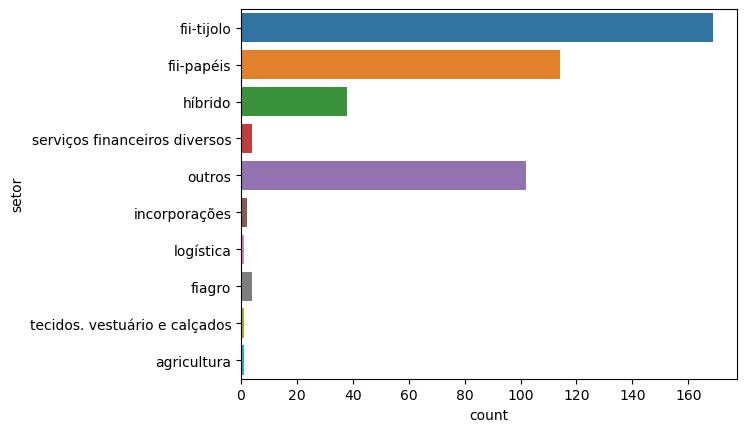

In [43]:
sns.countplot(data = fiis,
               y = 'setor');

Observa-se que a maioria dos fundos são de tijolo, pois este engloba uma quantidade grande de subsetores. 

Na análise seguinte, serão identificados os subsetores, assim veremos como se subdividem em quantidade.

<Axes: xlabel='count', ylabel='subsetor'>

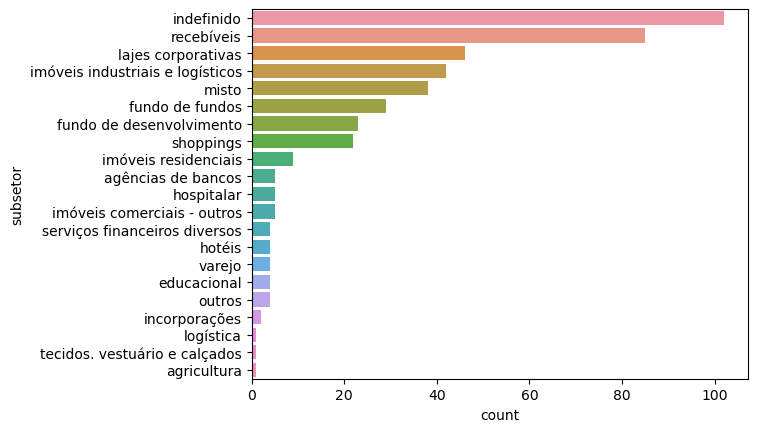

In [44]:
# Calcular a contagem de ativos em cada subsetor
subsetor_counts = fiis['subsetor'].value_counts()

# Obter a ordem dos subsetores com base na contagem de ativos
order_subsetor = subsetor_counts.index

sns.countplot(data = fiis,
               y = 'subsetor',
             order=order_subsetor)


## Correlação

Agora mostraremos os dados mais relevantes levantados via gráfico a fim de mostrar o comportamento entre as medidas 'dy', 'pvp', 'n_cotistas', 'quant_ativos' ,'preco', 'ifix', 'dy_patr'.


In [45]:
fiis.columns

Index(['dividendo_status', 'dy', 'pva_status', 'pvp', 'liquidez_diaria',
       'perc_caixa', 'cagr_div_3a', 'cagr_valor_3a', 'n_cotistas', 'gestao',
       'n_cotas_status', 'subsetor', 'liq_diaria_funds', 'ult_dividendo_funds',
       'dy_funds', 'dy_3m_acum', 'dy_6m_acum', 'dy_3m_media', 'dy_6m_media',
       'dy_12m_media', 'dy_ano_funds', 'var_preco', 'rentabilidade',
       'rentabilidade_acum', 'vpa_funds', 'pvpa_funds', 'dy_patr', 'var_patr',
       'rentab_patr', 'rentab_patr_acum', 'quant_ativos', 'volatilidade',
       'ifix', 'preco', 'patrimonio_milhoes', 'setor'],
      dtype='object')

<Axes: >

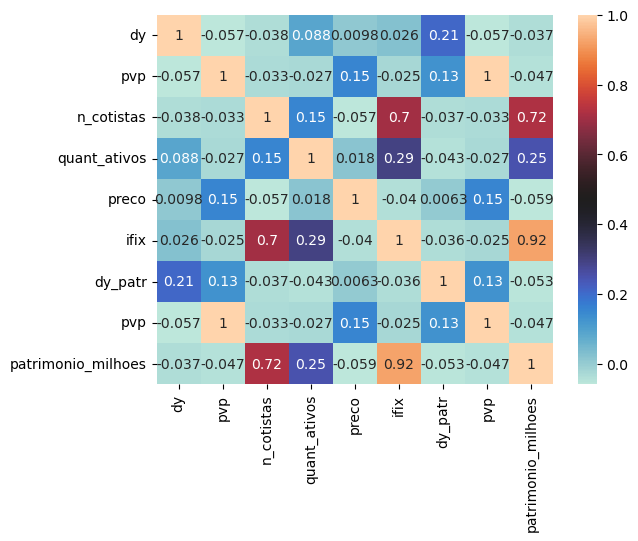

In [46]:
sns.heatmap(fiis[['dy','pvp','n_cotistas','quant_ativos','preco','ifix','dy_patr','pvp','patrimonio_milhoes']].corr(),
           cmap='icefire', annot=True)

Observa-se correlação forte entre os FII's componentes do IFIX, tanto com relação ao número de cotistas, quanto em relação ao seu Patrimônio Líquido.

Todos os demais apresentam pouca correlação ou quase nenhuma.

## Preço / Valor patrimonial

Agora vamos explorar os dados de PVP por subsetor retirando os outliers acima de 2 (na última análise, 7 dentre os Fundos extrapolam este limite).

### Identificando FIIs com distorção na coluna 'pvp'

In [47]:
print(f' Mediana dos PVPs: {fiis.pvp.median()}')
fiis[['subsetor', 'pvp', 'patrimonio_milhoes','pvpa_funds','pva_status','preco']].sort_values(by='pvp', 
                                                  ascending=False).head(10)

 Mediana dos PVPs: 0.8399999737739563


,subsetor,pvp,patrimonio_milhoes,pvpa_funds,pva_status,preco
ticker,,,,,,
ANCR11B,NaN,29.370001,2.931810e+03,NaN,109.66,3221.00
IDGR11,misto,16.670000,7.936895e+04,NaN,0.00,1.50
FAOE11,indefinido,14.530000,1.181556e+08,NaN,0.00,926.90
LSOI11,misto,9.200000,1.113005e+07,NaN,9.24,85.00
HDEL11,imóveis industriais e logísticos,2.250000,3.696919e+07,NaN,44.01,99.00
PNRC11,indefinido,1.890000,2.219655e+07,NaN,54.12,102.52
JBFO11,recebíveis,1.870000,1.025842e+07,NaN,8.02,15.03
DOVL11B,NaN,1.820000,4.375000e+01,NaN,658.75,1200.69
BVAR11,NaN,1.740000,5.036800e+02,NaN,805.20,1400.00


Observa-se que é importante avaliar se tem FII com valor distorcendo as estatísticas. Nesta análise, alguns PVPs estão muito acima das medianas, chamados de *outliers*.

### Plotando o gráfico

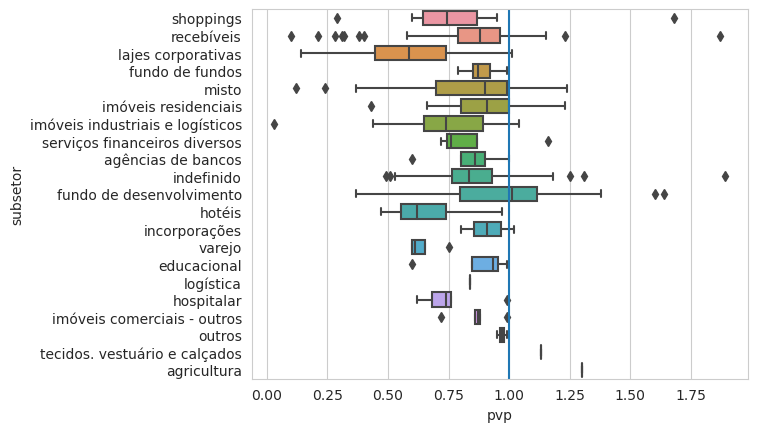

In [48]:
with sns.axes_style('whitegrid'):
    ax=sns.boxplot(x = fiis['pvp'][fiis['pvp']<2],
                y = fiis['subsetor'])
    ax.axvline(x = 1)    # Line on x = 1


PVP é um indicador referencial interessante para apontar se o valor de mercado está "barato" ou "caro" em relação ao último valor patrmonial avaliado dos ativos daquele FII.

Abaixo de 1 indica que há um desconto sobre o valor real, portanto, possui um upside.

Enquanto, se acima de 1 ele está sobreprecificado e tem pressão para voltar para 1.

Durante a pandemia, os FIIs de Tijolo estavam descontados e voltaram ao patamar mais próximo da referência 1,enquanto os de Papel decolaram com os altos índices de Inflação e expectativa de aumento da Taxa Básica de Juros (SELIC) para contê-los.

## Dividend Yield

Conforme o [artigo da Suno](https://www.suno.com.br/guias/dividend-yield/#:~:text=O%20significado%20de%20Dividend%20Yield,rela%C3%A7%C3%A3o%20%C3%A0s%20suas%20cota%C3%A7%C3%B5es%20atuais.), Dividendo yield é a relação entre  ou proventos a empresa pagou nos últimos 12 meses em relação ao preço de cotação de mercado.


Lembra-se que este dado é estático e que deve ser avaliado individualmente, por motivo de haver a possibilidade de um dividendo ser pago de forma extraordinária, amortização ou algum evento muito relevante do fundo.

Nesta tabela, mostra-se os 30 FIIs com maior Dividend Yield:

In [49]:
fiis[['subsetor','dy']].sort_values(by='dy', ascending=False).head(30)

,subsetor,dy
ticker,,
SNLG11,imóveis industriais e logísticos,202.029999
FAMB11,NaN,144.419998
LSPA11,recebíveis,141.160004
HGPO11,lajes corporativas,107.400002
JPPC11,NaN,68.120003
JSCR11,recebíveis,67.660004
BBFI11,NaN,62.709999
BRIP11,fundo de desenvolvimento,47.360001
RBRI11,fundo de desenvolvimento,40.709999


Neste gráfico, a cereja do bolo, comparo os fundos imobiliários com a linha de referência, a SELIC (10,25%) em agosto/2024, com os distribuição dos dados agrupados por subsetor.

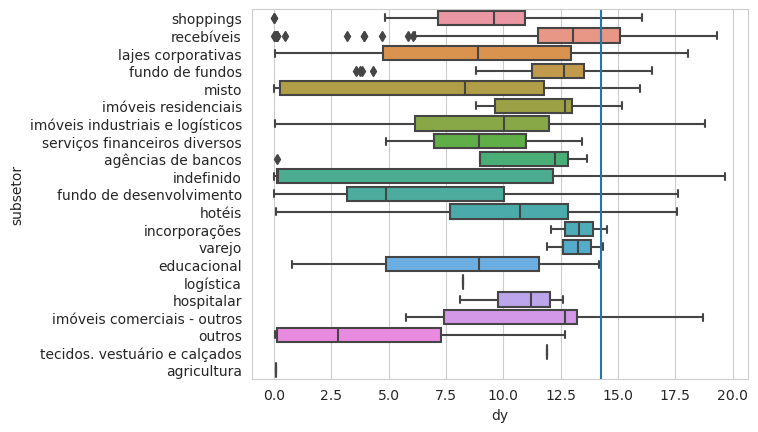

In [58]:
with sns.axes_style('whitegrid'):
    ax = sns.boxplot(x = fiis.dy[fiis['dy']<20],
                y = fiis['subsetor'])
    ax.axvline(x = 14.25)    # Line on x = 2
           

Rendimentos altos tendem a refletir ativos de maior risco, como recebíveis (risco de calote) e  de hotéis (alta sazonalidade e pelo panorama econômico nacional).

Mas novamente, ressalto que em um segundo momento, cada ativos devem ser analisado através de seus relatórios e/ou por relatório de casas de análise. 

In [51]:
fiis[fiis.subsetor == 'educacional']

,dividendo_status,dy,pva_status,pvp,liquidez_diaria,perc_caixa,cagr_div_3a,cagr_valor_3a,n_cotistas,gestao,...,dy_patr,var_patr,rentab_patr,rentab_patr_acum,quant_ativos,volatilidade,ifix,preco,patrimonio_milhoes,setor
ticker,,,,,,,,,,,,,,,,,,,,,
FAED11,1.600000,14.160000,222.01,0.60,54945.43,1.89,0.64,14.52,4275.0,Passiva,...,0.0072,0.0201,0.0275,0.0935,4.0,18.22,0.0,134.02,1.537161e+08,fii-tijolo
FCFL11,0.860000,8.960000,123.13,0.93,189848.09,0.45,1.42,8.90,3540.0,Ativa,...,0.0070,0.0598,0.0672,0.2581,1.0,14.48,0.0,114.23,4.277700e+08,fii-tijolo
MINT11,0.749556,0.780000,97.17,0.99,0.00,16.33,NaN,0.88,94.0,Ativa,...,NaN,NaN,NaN,NaN,3.0,23.79,0.0,96.50,5.052767e+07,fii-tijolo
RBED11,1.040000,20.549999,0.00,0.94,0.00,NaN,15.30,3.73,10734.0,Ativa,...,0.0000,-1.0000,0.0000,0.0000,7.0,17.02,0.0,94.00,2.355177e+08,fii-tijolo


## Patrimônio Líquido

Cnoforme este [artigo da Suno](https://www.suno.com.br/guias/patrimonio-liquido/):
> O patrimônio líquido é um indicador contábil que representa a diferença entre o ativo e o passivo da organização. Ou seja, o PL demonstra a subtração entre os bens e direitos que uma empresa possui em relação às suas obrigações.

Abaixo, revelo os 20 maiores FIIs em milhões de reais:

In [52]:
fiis[['subsetor','patrimonio_milhoes']].sort_values(by = 'patrimonio_milhoes', ascending = False).head(20)

,subsetor,patrimonio_milhoes
ticker,,
KNCR11,recebíveis,7.780232e+09
KNIP11,recebíveis,7.273233e+09
XPML11,shoppings,6.648003e+09
HGLG11,imóveis industriais e logísticos,5.494305e+09
KNRI11,misto,4.545722e+09
BTLG11,imóveis industriais e logísticos,4.490816e+09
MXRF11,recebíveis,4.019083e+09
VISC11,shoppings,3.606260e+09
XPLG11,imóveis industriais e logísticos,3.333323e+09


Fitrando os FIIs com Patrimônio Líquido até R$ 2.500.000.000,00, observam-se as seguintes distribuições:

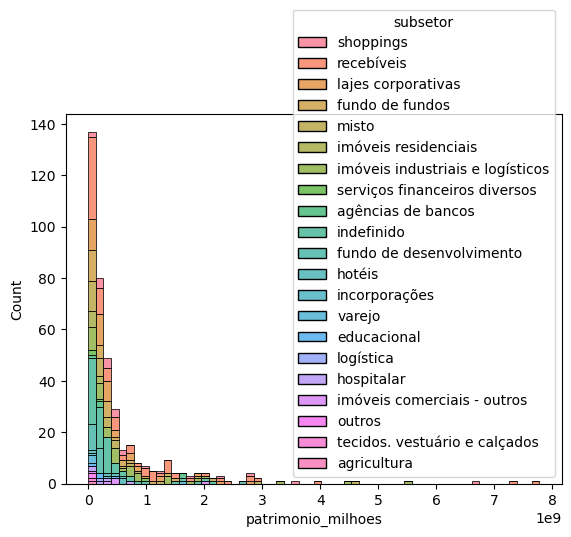

In [53]:
sns.histplot(data = fiis,
             x = fiis.patrimonio_milhoes,
             hue = fiis.subsetor,
             multiple='stack'
             );


Observa-se então a concentração dos FII's entre 200 e 500 milhões.

Quantidade de ativos por Valor Patrimonial

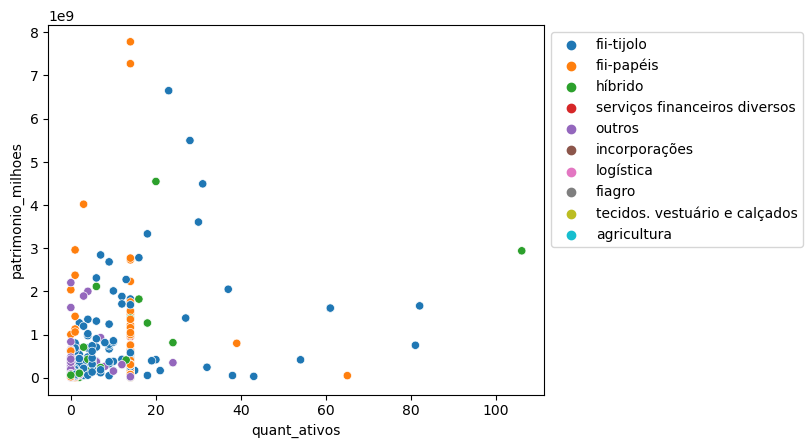

In [54]:
sns.scatterplot(x=fiis.quant_ativos,
           y=fiis.patrimonio_milhoes,
               hue=fiis.setor)
# Ajustando a posição da legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

Esperava-se uma linha crescente, porém, observam-se que há fundos com uma quantidade grande de ativos e baixo valor patrimonial, ao passo que outros com pouquíssimos imóveis com valor patrimonial altíssimo.

Parte dos resultados são devidos ao fato de haver Fundos híbridos, com grande patrimônio alocado em recebíveis e poucos ativos de "tijolo", como observado abaixo no cálculo de média patrimonial por ativo.

In [55]:
fiis_media_patrimonio = fiis[['setor','subsetor','quant_ativos','patrimonio_milhoes']][fiis.quant_ativos > 1]
fiis_media_patrimonio['valor_patr_por_ativo'] = fiis.patrimonio_milhoes / fiis.quant_ativos
fiis_media_patrimonio.sort_values(by='valor_patr_por_ativo',ascending=False)

,setor,subsetor,quant_ativos,patrimonio_milhoes,valor_patr_por_ativo
ticker,,,,,
MXRF11,fii-papéis,recebíveis,3.0,4.019083e+09,1.339694e+09
BROF11,fii-tijolo,lajes corporativas,2.0,1.272382e+09,6.361912e+08
KNHF11,outros,indefinido,3.0,1.892795e+09,6.309317e+08
KNCR11,fii-papéis,recebíveis,14.0,7.780232e+09,5.557308e+08
KNIP11,fii-papéis,recebíveis,14.0,7.273233e+09,5.195166e+08
...,...,...,...,...,...
RENV11,serviços financeiros diversos,serviços financeiros diversos,14.0,9.548526e+06,6.820376e+05
LSPA11,fii-papéis,recebíveis,14.0,8.473824e+06,6.052731e+05
BLUR11,fii-papéis,recebíveis,14.0,6.618174e+06,4.727267e+05


Observa-se curiosamente que os fundos de desenvolvimento despontam nos menores valores patrimoniais por quantidade de ativos.

Faremos nova análise analisando apenas os fundos de do setor Tijolo.

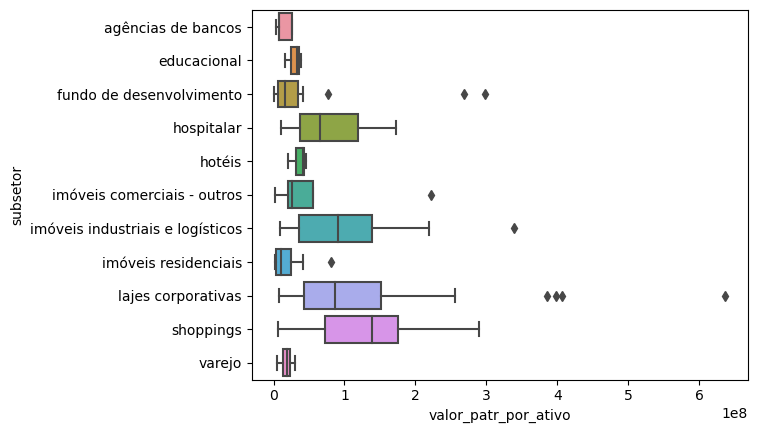

In [56]:
fiis_media_patrimonio = fiis_media_patrimonio[fiis_media_patrimonio.setor == "fii-tijolo"].sort_values(by='valor_patr_por_ativo',ascending=False)

# Calcular a contagem de ativos em cada subsetor
subsetor_median = fiis_media_patrimonio.groupby('subsetor')['valor_patr_por_ativo'].median()

# Obter a ordem dos subsetores com base na contagem de ativos
order_subsetor = subsetor_median.index

sns.boxplot(x=fiis_media_patrimonio.valor_patr_por_ativo,
           y=fiis_media_patrimonio.subsetor,
           order = order_subsetor)

plt.show()

Por fim temos o gráfico de distribuição dos valores patrimoniais por subsetor.
Temos que os Fundos de imóveis industriais e logísticos, de lajes corporativas e de shopping têm a maior variação de valor médio patrimonial por ativo.

Os shoppings têm maior mediana de valores patrimoniais, enquanto as agências bancárias têm a menor.

## Gráfico de dispersão comparando de PVP com DY
Foram utilizados os atributos:
- Eixo Y: PVP (ou P/VP, preço sobre valor patrimonial) é um indicador muito importante, sempre considerado ao avaliar um fundo imobiliário
- Eixo X: DY (dividend yield), o rendimento anualizado do fundo
- Cor: Subsetor
- Tamanho: Valor Patrimonial

O seguinte gráfico avalia a distribuição destes dados.

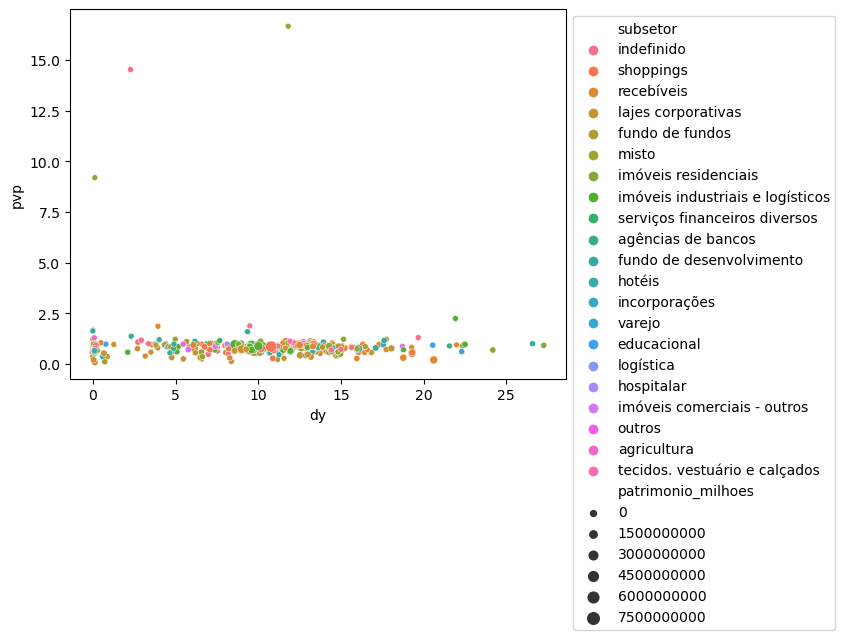

In [57]:
sns.scatterplot(x = fiis.dy[fiis.dy<30], 
                y=fiis.pvp[fiis.pvp<100], 
                size=fiis.patrimonio_milhoes, 
                hue=fiis.subsetor,
               legend='brief');
# Ajustando a posição da legenda
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Exibindo o gráfico
plt.show()

Como esperado, os fundos imobiliários circundam ao redor do valor 1 de P/VP e as maiores concentrações de DY entre 8 e 15%, inclusive os fundos mais volumosos.
Os demais que se afastam desta zona de concentração devem ser avaliados individualmente, pois podem ser distorções ou distribuições extraordinárias.

# Dashboard

Para avaliação dinâmica individualmente de cada Fundo, foi disponibilizado o [Dashboard no Data Studio](https://lookerstudio.google.com/reporting/53730090-72ed-4b01-baa7-48b6536e3018).